# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking.

<b><u>In most cases just reporting results without discussion will not receive full credit.</u></b> Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [89]:
# imports
import numpy as np
from scipy.io import arff
import pandas as pd

## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct.

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [90]:
from sklearn.linear_model import Perceptron

Data_Set = arff.loadarff('debug.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

clf = Perceptron(shuffle=False, verbose=1, eta0=.1, max_iter=10)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))

-- Epoch 1
Norm: 0.04, NNZs: 2, Bias: -0.100000, T: 8, Avg. loss: 0.013500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 2, Bias: -0.100000, T: 16, Avg. loss: 0.011875
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 2, Bias: -0.100000, T: 24, Avg. loss: 0.010250
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 2, Bias: -0.100000, T: 32, Avg. loss: 0.008625
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 2, Bias: -0.100000, T: 40, Avg. loss: 0.007000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 48, Avg. loss: 0.005375
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 2, Bias: -0.100000, T: 56, Avg. loss: 0.008250
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.25, NNZs: 2, Bias: -0.100000, T: 64, Avg. loss: 0.007625
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.27, NNZs: 2, Bias: -0.100000, T: 72, Avg. loss: 0.007000
Total training time: 0.01 seconds.
--

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (5%) Evaluation

Now train a perceptron model  on the [banknote authentication dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [91]:
# Load evaluation data
# Train on the evaluation data
# print your accuracy and weights. Do not enter these values by hand.
def open_file(name):
  return arff.loadarff(name)

Data_Set = open_file('data_banknote_authentication.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

clf = Perceptron(shuffle=False, verbose=1, eta0=.1, max_iter=10)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))

-- Epoch 1
Norm: 1.42, NNZs: 4, Bias: 2.100000, T: 1372, Avg. loss: 0.023615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.90, NNZs: 4, Bias: 2.600000, T: 2744, Avg. loss: 0.022359
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 4, Bias: 3.500000, T: 4116, Avg. loss: 0.028435
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 4, Bias: 3.700000, T: 5488, Avg. loss: 0.013195
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.51, NNZs: 4, Bias: 4.300000, T: 6860, Avg. loss: 0.015216
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 4.70, NNZs: 4, Bias: 4.700000, T: 8232, Avg. loss: 0.026061
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 5.40, NNZs: 4, Bias: 4.600000, T: 9604, Avg. loss: 0.018060
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 5.83, NNZs: 4, Bias: 4.800000, T: 10976, Avg. loss: 0.018378
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 5.88, NNZs: 4, Bias: 5.200000, T: 12348, Avg. loss: 0.015085
Total training time: 0.01

#### Discussion
Open the box below and type in your discussion.  Note that after each exercise you will have a chance to discuss your effort and results. What was your final accuracy? What was your experience running on the banknote authentication dataset?

I was very intrigued that the banknote data got a better accuracy than the debug dataset. The banknote data had a 97.7% accuracy when the debug data had 87.5% accuracy. Looking over the data it makes sense that since the banknote dataset has a lot more data to train on that it would be more accurate. What I like about this agorithm is that the only input is the input data. This makes this algorithm very robust and able to handle many different kinds of data that can be separated by a series of weights.

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs with 4 instances from each class.
- One data set should be linearly separable and the other not.
- Show or print your datasets

In [92]:
# Create and show the 2 datasets.
# You could do it here in Python or create arff files in your local folder with a text editor.  Either way show your dataset.

# Linearly separable data:
Data_Set = open_file('linear.arff')
linearDF = pd.DataFrame(Data_Set[0])
print('Linear:')
print(linearDF)

print()

# Non-linearly separable data:
Data_Set = open_file('nonlinear.arff')
nonlinearDF = pd.DataFrame(Data_Set[0])
print('Nonlinear:')
print(nonlinearDF)

Linear:
    x1   x2 class
0  0.1  0.8  b'1'
1  0.2  0.9  b'1'
2  0.1  0.7  b'1'
3  0.3  0.9  b'1'
4  0.3  0.1  b'0'
5  0.4  0.2  b'0'
6  0.5  0.3  b'0'
7  0.7  0.2  b'0'

Nonlinear:
    x1   x2 class
0  0.1  0.8  b'1'
1  0.2  0.9  b'1'
2  0.5  0.3  b'1'
3  0.7  0.2  b'1'
4  0.3  0.2  b'0'
5  0.4  0.5  b'0'
6  0.3  0.4  b'0'
7  0.4  0.2  b'0'


### 2.2 (5%) Train on both sets using the scikit-learn perceptron model
- Train on each and print the results. Train until convergence (i.e. use the default max_iter by simply not specifying it).
- You may choose your other hyperparameters.

In [93]:
# Train and print results with both datasets
print('Linear:')
Data_Set_np = linearDF.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

clf = Perceptron(shuffle=False, verbose=1, eta0=.1)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))

print()

print('Nonlinear:')
Data_Set_np = nonlinearDF.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

clf = Perceptron(shuffle=False, verbose=1, eta0=.1, max_iter=10)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))

Linear:
-- Epoch 1
Norm: 0.08, NNZs: 2, Bias: -0.100000, T: 8, Avg. loss: 0.014625
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.14, NNZs: 2, Bias: -0.100000, T: 16, Avg. loss: 0.009000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 24, Avg. loss: 0.003375
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 32, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 40, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 48, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 56, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 64, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 72, Avg. loss: 0.000000
Total training time: 0.01 sec

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


#### Discussion
What is different about the two runs? What makes one dataset not linearly separable? What is the result of the training? What is the accuracy of the two models?

A few of the differences between the two datasets was that the linear data took less epochs to converge than the nonlinear data, and the linear data had substantially less average loss than the nonlinear data. Besides those differences the main difference was in the accuracy of how the perceptron separated the data. The linear data set was able to converge with 100% accuracy, when the nonlinear dataset converged with 62.5% accuracy. The reason for the low accuracy with the nonlinear data, and the reason that the data is not linearly separable, was because for one of the classes I intentionally clustered it in the middle, with the other class surrounding that cluster on both sides. Idealy this data would be quadratically separable, but because the model cannot separate the data with one straight line, it is considered not linearly separable. The result of the training for this data set was to find weights that would create a line with most of the data separated. However, the accuracy of the outcome suggests that using a linear perceptron model in this instance is not effective.

### 2.3 (10%) Graph the datasets and their corresponding decision line

 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discssed how to find the slope and intercept in class and the equation is in the Perceptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like

![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

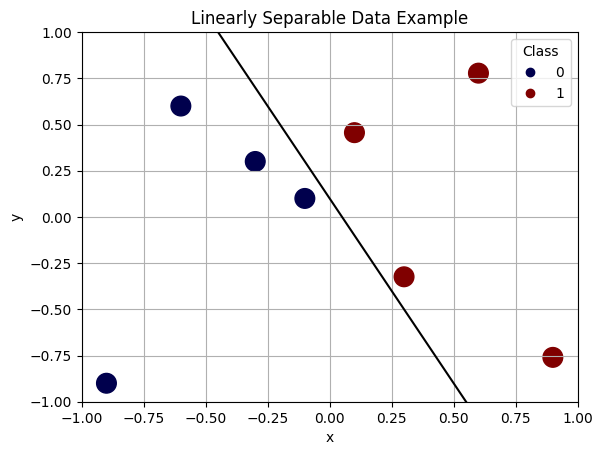

In [94]:
# Sample Graph code, You can use any graphing approach you want including this one.
# We encourage you to use matplotlib.
import matplotlib.pyplot as plt

# The data in this example is made up.  You will use your real data.
data = np.array([[-.9,-.9],[-.6,.6],[-.3,.3],[-.1,.1],[.1,.456],[.3,-.324],[.6,.778],[.9,-.76]])
labels = np.array([0,0,0,0,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-1,1)
plt.ylim(-1,1)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = -2  # made up
intercept = 0.1 # made up
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

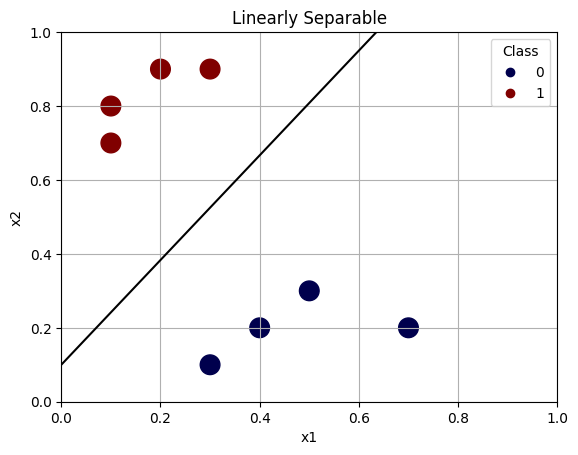

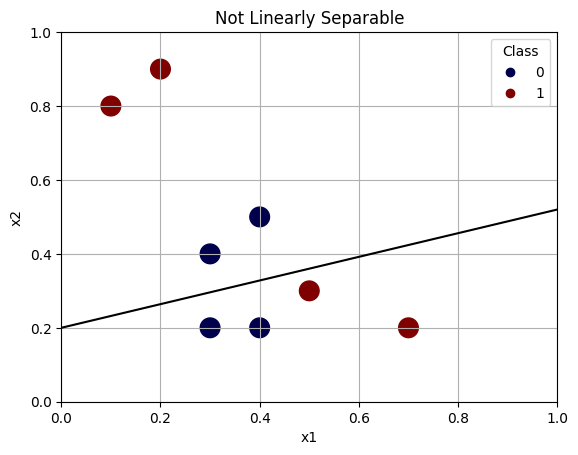

In [95]:
# Graph datasets and decision lines for both cases.

#Linear:
import matplotlib.pyplot as plt

data = np.array([[0.7,0.2],[0.5,0.3],[0.4,0.2],[0.3,0.1],[0.3,0.9],[0.1,0.7],[0.2,0.9],[0.1,0.8]])
labels = np.array([0,0,0,0,1,1,1,1])
plt.xlim(0,1)
plt.ylim(0,1)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right')
xlist = np.linspace(-1.0, 1.0, 100)
ylist = np.linspace(-1.0, 1.0, 100)
slope = 0.17/0.12
intercept = 0.1
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

print()

#Non Linear:
import matplotlib.pyplot as plt

data = np.array([[0.4,0.2],[0.3,0.4],[0.4,0.5],[0.3,0.2],[0.7,0.2],[0.5,0.3],[0.2,0.9],[0.1,0.8]])
labels = np.array([0,0,0,0,1,1,1,1])
plt.xlim(0,1)
plt.ylim(0,1)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right')
xlist = np.linspace(-1.0, 1.0, 100)
ylist = np.linspace(-1.0, 1.0, 100)
slope = 0.08/0.25
intercept = 0.2
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Not Linearly Separable')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

#### Discussion
What makes a dataset not linearly separable? How is the decision line determined? slope? y-intercept?

If there is no way that a strait line can be drawn between the datapoints clearly separating them, than the data is not linearly separable. The decision line is determined by using the resulting weights and bias from the perceptron. The slope becomes the negative first weight divided by the second weight, and the y-intercept becomes the negative bias weight divided by the second weight.

### 2.4 (5%) Discussion - In general, why will perceptrons not get perfect accuracy on non-linearly separable data

If the dataset is not linearly separable, the perceptron cannot get perfect accuracy because there will always be some part of the class that will not be on the side of the line with the majority. The data will be split or clustered in a way that will not support the data perfectly separating on two sides of the line. Because of this, the perceptron will not converge to perfect accuracy.

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute. Look at the [tutorial](https://github.com/cs472ta/CS472/blob/master/Tutorial.ipynb) from the Labs Content page to see examples of prepping the voting data set for sklearn.

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 70/30 Training/Test splits each time
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the 5 trials and the average training and test accuracy and number of epochs to converge across the 5 trials in a table
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 |

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [96]:
# Run the perceptron 5 times on the voting data set with different splits and record the results.
# Hint: look up scikit-learn train_test_split
# Create the table using the tool of your choice
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

voting_data = open_file('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])
label_encoder = LabelEncoder()
voting_label_encoded_df = voting_df.apply(label_encoder.fit_transform)
Data_Set_np = voting_label_encoded_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)

X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

trials = []
training_acc = []
test_acc = []
epochs = []

for i in range(5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=i)
  clf = Perceptron(shuffle=False, verbose=0, eta0=1)
  clf.fit(X_train, y_train)
  train = clf.score(X_train, y_train)
  test = clf.score(X_test, y_test)
  num_epochs = clf.n_iter_
  trials.append(i+1)
  training_acc.append(train)
  test_acc.append(test)
  epochs.append(num_epochs)

trials.append("Average")
training_acc.append(np.mean(training_acc))
test_acc.append(np.mean(test_acc))
epochs.append(np.mean(epochs))

result = pd.DataFrame({"Trial": trials, "Training Accuracy": training_acc, "Test Accuracy": test_acc, "Number of Epochs": epochs})
print(result)

     Trial  Training Accuracy  Test Accuracy  Number of Epochs
0        1           0.972050       0.956835              17.0
1        2           0.913043       0.906475              11.0
2        3           0.965839       0.949640              20.0
3        4           0.968944       0.964029              12.0
4        5           0.962733       0.964029              14.0
5  Average           0.956522       0.948201              14.8


### 3.2 (10%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result.
- Which specific features are most critical for the voting task, and which are least critical?

In [97]:
#Learn once on the full voting data set.  If you Look at our tutorial at the beginning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

voting_data = open_file('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])
label_encoder = LabelEncoder()
voting_label_encoded_df = voting_df.apply(label_encoder.fit_transform)
Data_Set_np = voting_label_encoded_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)

X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)
clf = Perceptron(shuffle=False, verbose=0, eta0=1)
clf.fit(X_train, y_train)
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)
num_epochs = clf.n_iter_

print(voting_df.columns.tolist())
print(clf.coef_)
print(clf.intercept_)
print(train)
print(test)
print(num_epochs)
print(f'The feature that is most crucial is {voting_df.columns.tolist()[3]}, {voting_df.columns.tolist()[6]}, {voting_df.columns.tolist()[9]}, {voting_df.columns.tolist()[8]}.')
print(f'The feature that is least crucial is {voting_df.columns.tolist()[11]}, {voting_df.columns.tolist()[12]}, {voting_df.columns.tolist()[15]}.')
print()
"""
  The model has learned how to differenciate the two classes, republican and democrat,
  from the dataset based on the given features. The individual input features affect
  the result by affecting how the weights shift with each epoch, eventually showing
  which weights have the highest effect on the result. The most crucial features in
  this dataset are the physician-fee-freeze, anti-satellite-test-ban, immigration, and mx-missile.
  This means that between republicans and democrats, these had the most different values.
  The least crucial features for the voting task were the education-spending, superfund-right-to-sue,
  and export-administration-act-south-africa, meaning that these features had very
  similar values between the two classes.
                                                                                  """

['handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa', 'Class']
[[-5. -5. -7. 17.  4. -4.  8.  2. -8.  8. -7.  1.  1.  2. -4. -1.]]
[-5.]
0.968944099378882
0.9424460431654677
9
The feature that is most crucial is physician-fee-freeze, anti-satellite-test-ban, immigration, mx-missile.
The feature that is least crucial is education-spending, superfund-right-to-sue, export-administration-act-south-africa.



'\n  The model has learned how to differenciate the two classes, republican and democrat, \n  from the dataset based on the given features. The individual input features affect\n  the result by affecting how the weights shift with each epoch, eventually showing\n  which weights have the highest effect on the result. The most crucial features in \n  this dataset are the physician-fee-freeze, anti-satellite-test-ban, immigration, and mx-missile.\n  This means that between republicans and democrats, these had the most different values.\n  The least crucial features for the voting task were the education-spending, superfund-right-to-sue,\n  and export-administration-act-south-africa, meaning that these features had very \n  similar values between the two classes.\n                                                                                  '

### Discussion
How do the different features in the dataset effect prediction? How could you determine this?

The different features in the dataset provide the data to change the weights that will create the decision boundary between the data. The way to know how much a feature contributes to the boundary, is by analyzing the absolute value of the resulting weight. If the absolute value of the weight is high, then that feature contributes a lot to the resulting prediction. If the absolute value of the coorosponding weight is low, then it has little effect on the prediction

### 3.3 (15%) Misclassification rate vs epochs

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial misclassification rate is 50% and let that be the first point on your graph. Since there are 2 output classes, random guessing would only get it right about 1/2 of the time. Missclassifcation rate is 1 - accuracy.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

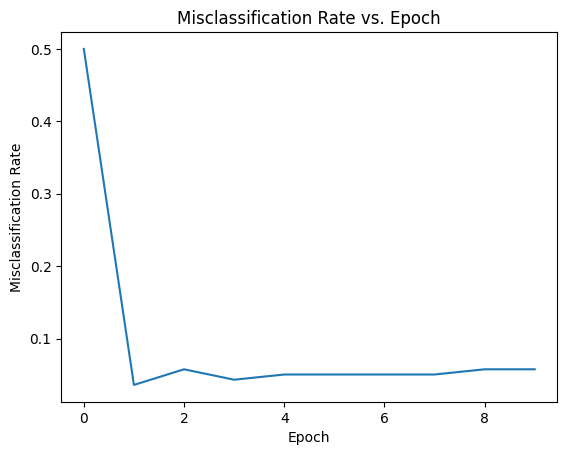

In [98]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.

# 9 epochs

voting_data = open_file('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])
label_encoder = LabelEncoder()
voting_label_encoded_df = voting_df.apply(label_encoder.fit_transform)
Data_Set_np = voting_label_encoded_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)

X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

misclassifications = [.5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)
clf = Perceptron(shuffle=False, verbose=0, eta0=1, max_iter=1, warm_start=True)
for i in range(9):
  clf.fit(X_train, y_train)
  test = clf.score(X_test, y_test)
  misclassifications.append(1-test)

def plot_misclassification(misclassification_rate):
    """
        Plots the misclassification rate
    Args:
        misclassification_rate (array-like): A 1D array or list of missclassifcation rate at every epoch
    """
    plt.plot(np.arange(len(misclassification_rate)), misclassification_rate)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

plot_misclassification(misclassifications)

#### Discussion
Discuss the results in your graph. How quickly does the perceptron converge? Do you think this is typical? Are there any anomalies or anything you didn't expect?

The perceptron converged within the first epoch, and then just optimized the algorithm. I think this is typical of most perceptrons, because the weights will change the most with the first epoch as this data is the first thing the perceptron has seen, and will start to move the weights in the right direction. The next iterations are giving the perceptron similar data overall, so the weights are only changing slightly to become more refined to the data after this point. I didn't expect for the first epoch to have a smaller misclassification rate than the other epochs though. It makes sense to have some variability between each epoch, but I though the 8th or 9th epoch would have had the highest accuracy, rather than the first epoch.

### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following 6 hyperparameters and discuss your findings.
- shuffle
- eta0 - learning rate
- verbose
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

In [99]:
# Run the model with different hyperparameters
voting_data = open_file('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])
label_encoder = LabelEncoder()
voting_label_encoded_df = voting_df.apply(label_encoder.fit_transform)
Data_Set_np = voting_label_encoded_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)

X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)

#control
print("control:")
clf = Perceptron(shuffle=False, verbose=0, eta0=1)
clf.fit(X_train, y_train)
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)
num_epochs = clf.n_iter_

print(clf.coef_) #weights
print(clf.intercept_) #bias
print(train) #accuracy of training set
print(test) #accuracy of test set
print(num_epochs) #total epochs
print()

#shuffle
print("shuffle:")
clf = Perceptron(shuffle=True, verbose=0, eta0=1)
clf.fit(X_train, y_train)
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)
num_epochs = clf.n_iter_

print(clf.coef_) #weights
print(clf.intercept_) #bias
print(train) #accuracy of training set
print(test) #accuracy of test set
print(num_epochs) #total epochs
print()

#eta0/learning rate
print("learning rate:")
clf = Perceptron(shuffle=False, verbose=0, eta0=0.5)
clf.fit(X_train, y_train)
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)
num_epochs = clf.n_iter_

print(clf.coef_) #weights
print(clf.intercept_) #bias
print(train) #accuracy of training set
print(test) #accuracy of test set
print(num_epochs) #total epochs
print()

#verbose
print('verbose:')
clf = Perceptron(shuffle=False, verbose=1, eta0=1)
clf.fit(X_train, y_train)
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)
num_epochs = clf.n_iter_

print(clf.coef_) #weights
print(clf.intercept_) #bias
print(train) #accuracy of training set
print(test) #accuracy of test set
print(num_epochs) #total epochs
print()

#fit_intercept
print('fit_intercept')
clf = Perceptron(shuffle=False, verbose=0, eta0=1, fit_intercept=False)
clf.fit(X_train, y_train)
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)
num_epochs = clf.n_iter_

print(clf.coef_) #weights
print(clf.intercept_) #bias
print(train) #accuracy of training set
print(test) #accuracy of test set
print(num_epochs) #total epochs
print()

#random state
print('random state')
clf = Perceptron(shuffle=True, verbose=0, eta0=1, random_state=1)
clf.fit(X_train, y_train)
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)
num_epochs = clf.n_iter_

print(clf.coef_) #weights
print(clf.intercept_) #bias
print(train) #accuracy of training set
print(test) #accuracy of test set
print(num_epochs) #total epochs
print()

#warm start
print('warm start')
clf = Perceptron(shuffle=False, verbose=0, eta0=1, warm_start=True)
clf.fit(X_train, y_train)
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)
num_epochs = clf.n_iter_

print(clf.coef_) #weights
print(clf.intercept_) #bias
print(train) #accuracy of training set
print(test) #accuracy of test set
print(num_epochs) #total epochs
print()

control:
[[-5. -5. -7. 17.  4. -4.  8.  2. -8.  8. -7.  1.  1.  2. -4. -1.]]
[-5.]
0.968944099378882
0.9424460431654677
9

shuffle:
[[-2. -3. -5. 18.  5. -8.  5.  6. -8.  7. -7.  0.  4.  3. -5. -1.]]
[-10.]
0.9720496894409938
0.9496402877697842
11

learning rate:
[[-2.5 -2.5 -3.5  8.5  2.  -2.   4.   1.  -4.   4.  -3.5  0.5  0.5  1.
  -2.  -0.5]]
[-2.5]
0.968944099378882
0.9424460431654677
9

verbose:
-- Epoch 1
Norm: 12.92, NNZs: 15, Bias: -1.000000, T: 322, Avg. loss: 0.357143
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 16.70, NNZs: 13, Bias: -2.000000, T: 644, Avg. loss: 0.236025
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 19.13, NNZs: 15, Bias: -3.000000, T: 966, Avg. loss: 0.195652
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 21.47, NNZs: 14, Bias: -3.000000, T: 1288, Avg. loss: 0.180124
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 22.61, NNZs: 15, Bias: -4.000000, T: 1610, Avg. loss: 0.229814
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 23.73,

#### Discussion
Discuss your findings from the experimentation with the hyperparameters.

The changes in the training and test accuracy, the change in the weight values, and the overall epochs with the different parameters really intrigued me. While most training data got to the same amount of accuracy, it is interesting that by shuffling the data, the training acuracy increased from my control. Also, when I didn't have the algorithm calculate the intercept the accuracy of the training data went down. I can understand that as the data gets shuffled around with each epoch, that the data can get more accurate because it is testing more combinations of the data. What is interesting though is that even though the fit_intercept decreased the training data's accuracy, it increased accuracy for the test data from the control. The random state had the same effect. The weights all stayed about the same when the learning rate was the same, regardless of the other parameters, but when the learning rate was changed the weights changed with the magnitude of the learning rate. The number of epochs were pretty variable across the data, but since the accuracy was all very similar, it seemed that the longer or shorter it took didn't have too much of an effect.

## 4. (10%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [100]:
# Load and Train on your dataset and report results

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("wdbc.data")
df.drop(columns=df.columns[0], inplace=True)
df.rename(columns={df.columns[0]: 'diagnosis'}, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)
clf = Perceptron(shuffle=False, verbose=0, eta0=1)
clf.fit(X_train, y_train)
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)
num_epochs = clf.n_iter_

print(clf.coef_)
print(clf.intercept_)
print(train)
print(test)
print(num_epochs)

[[ 9.01523636 -0.02411528  7.50289788  6.70564869  5.19946382 -6.55411932
   5.61842811 11.73806139 -7.30986446 -7.76562992 14.00889267 -6.56996363
   5.60040454 12.17858849  9.68211291 -1.82948624 -2.13374542  7.53169268
  -9.10332806 -4.36456871  7.36305734 19.74162415  3.08879129  6.58820749
   8.72357568  0.98829176 10.78293198  6.56726542 17.11166853 -0.98706187]]
[-5.]
0.9924433249370277
0.9707602339181286
22


#### Discussion
Discuss how the perceptron did on the data set and why you think it performed as such.

The perceptron did a very good job with the dataset, resulting in high accuracy. I think because the breast cancer data set was very black in white if a person had breast cancer or not, that it made it so the weights were easy to determine, and the process only took 33 epochs to converge.


## 5. (5%) Code up your own perceptron learner

Actually coding a model leads to better understanding of what is really happening "under the hood."  Below is a scaffold you could use if you want. Requirements for this task:
- Your perceptron should support the methods shown in the example scaffold below.
- Your output node should output 1 if net is > 0, else 0.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the evaluation data set and the voting data set above with your Perceptron version. Show and discuss your results and how they compare with the scikit-learn version.

In [101]:
# Your Perceptron Code
# Optional scaffold for Perceptron code.  IF you use this feel free to change/add any methods you want.

from sklearn.base import BaseEstimator, ClassifierMixin
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle

    def fit(self, X, y, initial_weights=None):
        """
            Fit the data; run the algorithm and adjust the weights to find a
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.weights = self.initialize_weights() * (len(X) + 1) if not initial_weights else initial_weights
        net = 0
        accuracy = 0.5
        temp_accuracy = 1
        while accuracy > temp_accuracy:
          right = 0
          total = 0
          for i in range(len(X)):
              iteration_net = 0
              for j in range(len(i)):
                  iternation_net += (X[i][j] * self.weights[j])
              output = 1 if iteration_net > 0 else 0
              if output == y[i]:
                right += 1
              if output != y[i]:
                  #change weights
                  for j in range(len(i)):
                    change = self.lr * (y[i] - output) * X[i][j]
                    self.weights[j] += change
              total += 1
          temp_accuracy = accuracy
          accuracy = right / total
        return self

    def predict(self, X):
        """
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        output_list = []
        for i in range(len(X)):
              iteration_net = 0
              for j in range(len(X[i])):
                  iteration_net += (X[i][j] * self.weights[j])
              output = 1 if iteration_net > 0 else 0
              output_list.append(output)
        return output_list

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """
        return [0]

    def score(self, X, y):
        """
            Return accuracy of model on a given dataset. Must implement own
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        test_scores = self.predict(X)
        right = 0
        for i in range(len(y)):
            if test_scores[i] == y[i]:
              right += 1
        return right / len(y)

    ### Returns the weights and bias. Not required but great for debugging.
    def get_weights(self):
        return self.weights, self.weights[-1]

Data_Set = open_file('data_banknote_authentication.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)
PC = PerceptronClassifier(0.1, False)
PC.fit(X_train, y_train)
print("Evaluation Data:")
print(f'Training Accuracy: {PC.score(X_train, y_train)}')
print(f'Test Accuracy: {PC.score(X_test, y_test)}')
print()

voting_data = open_file('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])
label_encoder = LabelEncoder()
voting_label_encoded_df = voting_df.apply(label_encoder.fit_transform)
Data_Set_np = voting_label_encoded_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)
PC = PerceptronClassifier(0.1, False)
PC.fit(X_train, y_train)
print('Voting Data:')
print(f'Training Accuracy: {PC.score(X_train, y_train)}')
print(f'Test Accuracy: {PC.score(X_test, y_test)}')

Evaluation Data:
Training Accuracy: 0.5552083333333333
Test Accuracy: 0.5558252427184466

Voting Data:
Training Accuracy: 0.5900621118012422
Test Accuracy: 0.6330935251798561


While my model didn't result in as high of accuracy as the built-in model, it did increase the accuracy from a simiple 50/50 guess for both datasets. This indicates, that while my convergence was not optimized, it is heading in the right direction. I stopped the algorithm when the accuracy of the model starts to decrease again, which could have stopped the model prematurely. However, this exercise was a good glimpse of what is happening behind the curtain in the code for this model.

In [102]:
# Optional scaffold for Perceptron code.  IF you use this feel free to change/add any methods you want.

from sklearn.base import BaseEstimator, ClassifierMixin
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle

    def fit(self, X, y, initial_weights=None):
        """
            Fit the data; run the algorithm and adjust the weights to find a
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """

        return [0]

    def score(self, X, y):
        """
            Return accuracy of model on a given dataset. Must implement own
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ### Returns the weights and bias. Not required but great for debugging.
    def get_weights(self):
        pass